In [16]:
from datetime import datetime
start_time = datetime.now().isoformat()
start_time

'2020-10-12T13:06:31.662911'

# BrainAtlas API: First Look

Taking a look at the brain atlas api to get a better idea of what it offers

# Goals for this notebook
  0. Successfully install the package.  
    - The easier this is to do, the better.
  1. Download the Allen Reference Atlas for Mice
  2. Browse the metadata (units, coords, source) inside Python.
  3. Load the template images into Numpy Arrays
    - Not 100% necessary, but would ensure that the package will be easy to use in a wide variety of workflows.  End application likely will have other data structures for the image.
  4. Visualize individual template slices from the atlas, alongside their coordinates.
    - To do registration, I'll need to know both what the image is and where it is. 

## 0. Installation

In [1]:
try:
    import bg_atlasapi
    print("Already installed")
except ImportError:
    %pip install bg-atlasapi


Already installed


In [2]:
from bg_atlasapi import BrainGlobeAtlas


Okay, that worked just fine!

## 1. Download the Allen Reference Atlas for Mice

In [3]:
BrainGlobeAtlas?

Init signature:
BrainGlobeAtlas(
    atlas_name,
    brainglobe_dir=None,
    interm_download_dir=None,
    check_latest=True,
    print_authors=True,
)
Docstring:     
Add remote atlas fetching and version comparison functionalities
to the core Atlas class.

Parameters
----------
atlas_name : str
    Name of the atlas to be used.
brainglobe_dir : str or Path object
    Default folder for brainglobe downloads.
interm_download_dir : str or Path object
    Folder to download the compressed file for extraction.
check_latest : bool (optional)
    If true, check if we have the most recent atlas (default=True). Set
    this to False to avoid waiting for remote server response on atlas
    instantiation and to suppress warnings.
print_authors : bool (optional)
    If true, disable default listing of the atlas reference.
File:           d:\miniconda\lib\site-packages\bg_atlasapi\bg_atlas.py
Type:           type
Subclasses:     


Looks like there is plenty of control over download location, although the docs say it [will be stored in the home directory by default](https://docs.brainglobe.info/bg-atlasapi/usage#0-creating-a-brainglobeatlas-object-and-list-availabe-options).

In [4]:
from bg_atlasapi import show_atlases

In [5]:
show_atlases()

Cool table!

Let's download one and see how this changes.

In [6]:
ara = BrainGlobeAtlas("allen_mouse_25um")
ara


allen mouse atlas (res. 25um)
From: http://www.brain-map.org (Wang et al 2020, https://doi.org/10.1016/j.cell.2020.04.007 )


allen mouse atlas (res. 25um)
From: http://www.brain-map.org (Wang et al 2020, https://doi.org/10.1016/j.cell.2020.04.007 )

Note: Got an error from tqdm initially when calling this function, complaining about the version of IPyWidgets.  I did some updating (following [this advice](https://stackoverflow.com/questions/53247985/tqdm-4-28-1-in-jupyter-notebook-intprogress-not-found-please-update-jupyter-an)) and things worked.  It's nice that this package has such good jupyter support, but for a simple data download package I don't think the problem should have arisen in the first place. 

In [8]:
ara

allen mouse atlas (res. 25um)
From: http://www.brain-map.org (Wang et al 2020, https://doi.org/10.1016/j.cell.2020.04.007 )

Okay, looks like it's downloaded!

In [9]:
show_atlases()

## 3. Browse the metadata (units, coords, source) inside Python.

In [17]:
ara

allen mouse atlas (res. 25um)
From: http://www.brain-map.org (Wang et al 2020, https://doi.org/10.1016/j.cell.2020.04.007 )

In [21]:
print([el for el in dir(ara) if not el.startswith('_')])

['additional_references', 'annotation', 'atlas_name', 'brainglobe_dir', 'check_latest_version', 'download_extract_file', 'get_structure_ancestors', 'get_structure_descendants', 'get_structure_mask', 'hemisphere_from_coords', 'hemispheres', 'hierarchy', 'interm_download_dir', 'left_hemisphere_value', 'local_full_name', 'local_version', 'lookup_df', 'mesh_from_structure', 'meshfile_from_structure', 'metadata', 'orientation', 'reference', 'remote_url', 'remote_version', 'resolution', 'right_hemisphere_value', 'root_dir', 'root_mesh', 'root_meshfile', 'shape', 'shape_um', 'space', 'structure_from_coords', 'structures', 'structures_list']


In [117]:
ara.orientation

'asr'

In [119]:
ara.reference.shape

(528, 320, 456)

In [120]:
ara.shape

(528, 320, 456)

In [121]:
ara.shape_um

(13200.0, 8000.0, 11400.0)

In [18]:
ara.atlas_name

'allen_mouse_25um'

In [24]:
ara.structures_list[:4]

[{'acronym': 'root',
  'id': 997,
  'name': 'root',
  'structure_id_path': [997],
  'rgb_triplet': [255, 255, 255],
  'mesh_filename': WindowsPath('C:/Users/Nick/.brainglobe/allen_mouse_25um_v1.2/meshes/997.obj')},
 {'acronym': 'grey',
  'id': 8,
  'name': 'Basic cell groups and regions',
  'structure_id_path': [997, 8],
  'rgb_triplet': [191, 218, 227],
  'mesh_filename': WindowsPath('C:/Users/Nick/.brainglobe/allen_mouse_25um_v1.2/meshes/8.obj')},
 {'acronym': 'CH',
  'id': 567,
  'name': 'Cerebrum',
  'structure_id_path': [997, 8, 567],
  'rgb_triplet': [176, 240, 255],
  'mesh_filename': WindowsPath('C:/Users/Nick/.brainglobe/allen_mouse_25um_v1.2/meshes/567.obj')},
 {'acronym': 'CTX',
  'id': 688,
  'name': 'Cerebral cortex',
  'structure_id_path': [997, 8, 567, 688],
  'rgb_triplet': [176, 255, 184],
  'mesh_filename': WindowsPath('C:/Users/Nick/.brainglobe/allen_mouse_25um_v1.2/meshes/688.obj')}]

In [71]:
mesh = ara.mesh_from_structure("CH")
mesh

<meshio mesh object>
  Number of points: 56703
  Number of cells:
    triangle: 112948
  Point data: obj:vn

In [75]:
print([el for el in dir(mesh) if not el.startswith('__')])

['cell_data', 'cell_data_dict', 'cell_sets', 'cell_sets_dict', 'cells', 'cells_dict', 'field_data', 'get_cell_data', 'get_cells_type', 'gmsh_periodic', 'info', 'int_data_to_sets', 'point_data', 'point_sets', 'points', 'prune_z_0', 'read', 'remove_lower_dimensional_cells', 'remove_orphaned_nodes', 'sets_to_int_data', 'write']


In [79]:
meshfilepath = ara.meshfile_from_structure('CH')
meshfilepath

WindowsPath('C:/Users/Nick/.brainglobe/allen_mouse_25um_v1.2/meshes/567.obj')

Nice that it has a wavefront exporter.  Funny that it just outputs the filename.  Are all the meshes pre-downloaded?

In [85]:
list(meshfilepath.parent.iterdir())[:10]

[WindowsPath('C:/Users/Nick/.brainglobe/allen_mouse_25um_v1.2/meshes/1.obj'),
 WindowsPath('C:/Users/Nick/.brainglobe/allen_mouse_25um_v1.2/meshes/10.obj'),
 WindowsPath('C:/Users/Nick/.brainglobe/allen_mouse_25um_v1.2/meshes/100.obj'),
 WindowsPath('C:/Users/Nick/.brainglobe/allen_mouse_25um_v1.2/meshes/1000.obj'),
 WindowsPath('C:/Users/Nick/.brainglobe/allen_mouse_25um_v1.2/meshes/1002.obj'),
 WindowsPath('C:/Users/Nick/.brainglobe/allen_mouse_25um_v1.2/meshes/1004.obj'),
 WindowsPath('C:/Users/Nick/.brainglobe/allen_mouse_25um_v1.2/meshes/1005.obj'),
 WindowsPath('C:/Users/Nick/.brainglobe/allen_mouse_25um_v1.2/meshes/1006.obj'),
 WindowsPath('C:/Users/Nick/.brainglobe/allen_mouse_25um_v1.2/meshes/1007.obj'),
 WindowsPath('C:/Users/Nick/.brainglobe/allen_mouse_25um_v1.2/meshes/1008.obj')]

Yep.

Let's copy the file to the local directory and try loading it in blender, just to ensure that it looks right.  I don't expect many problems, but we'll see.

In [91]:
import shutil
shutil.copy2(meshfilepath, "./data/ch_structure.obj")

'./data/ch_structure.obj'

I installed Blender and loaded it. Worked just fine!

![wireframe render](./data/Screenshot 2020-10-12 133100.png)

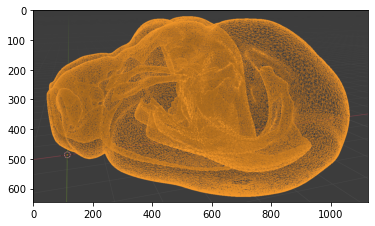

In [94]:
plt.imshow(plt.imread('data/Screenshot 2020-10-12 133100.png'));

In [96]:
ara.metadata

{'name': 'allen_mouse',
 'citation': 'Wang et al 2020, https://doi.org/10.1016/j.cell.2020.04.007',
 'atlas_link': 'http://www.brain-map.org',
 'species': 'Mus musculus',
 'symmetric': True,
 'resolution': [25.0, 25.0, 25.0],
 'orientation': 'asr',
 'version': '1.2',
 'shape': [528, 320, 456],
 'trasform_to_bg': [[1.0, 0.0, 0.0, 0.0],
  [0.0, 1.0, 0.0, 0.0],
  [0.0, 0.0, 1.0, 0.0],
  [0.0, 0.0, 0.0, 1.0]],
 'additional_references': []}

In [109]:
ara.structure_from_coords((50, 40, 30), as_acronym=True)

KeyError: 0

In [110]:
ara.structure_from_coords((50, 40, 30), as_acronym=False)

0

In [107]:
ara.structure_from_coords((5000, 4000, 3000), as_acronym=True, 
                               microns=True)

'CP'

In [108]:
ara.structure_from_coords((5000, 4000, 3000), as_acronym=False, 
                               microns=True)

672

The **structure_from_coords()** method seems a bit overcomplex.  Can't tell whether this will be an issue in the future or not, may need to wrap it or suggest changes upstream.

In [112]:
ara.hemisphere_from_coords((50, 40, 30))

2

In [113]:
ara.hemisphere_from_coords((5000, 4000, 3000), microns=True)


2

In [115]:
ara.hemisphere_from_coords((5000, 4000, 3000), microns=True, as_string=True)


'right'

Okay, 1 is 'left' and 2 is 'right'.  

In [ ]:
ara.

## 3. Get the Template Images into Numpy

In [128]:
ara.annotation.shape

(528, 320, 456)

In [129]:
import numpy as np

In [130]:
f"{(ara.annotation == 0).sum() / ara.annotation.size:.2%} nonzero entries"

'57.96% nonzero entries'

In [131]:
ara.annotation.min(), ara.annotation.max()

(0, 614454277)

In [132]:
len(ara.structures_list)

840

In [133]:
import matplotlib.pyplot as plt

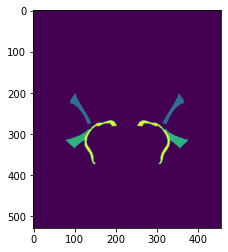

In [134]:
plt.imshow(ara.annotation[:, 60, :])

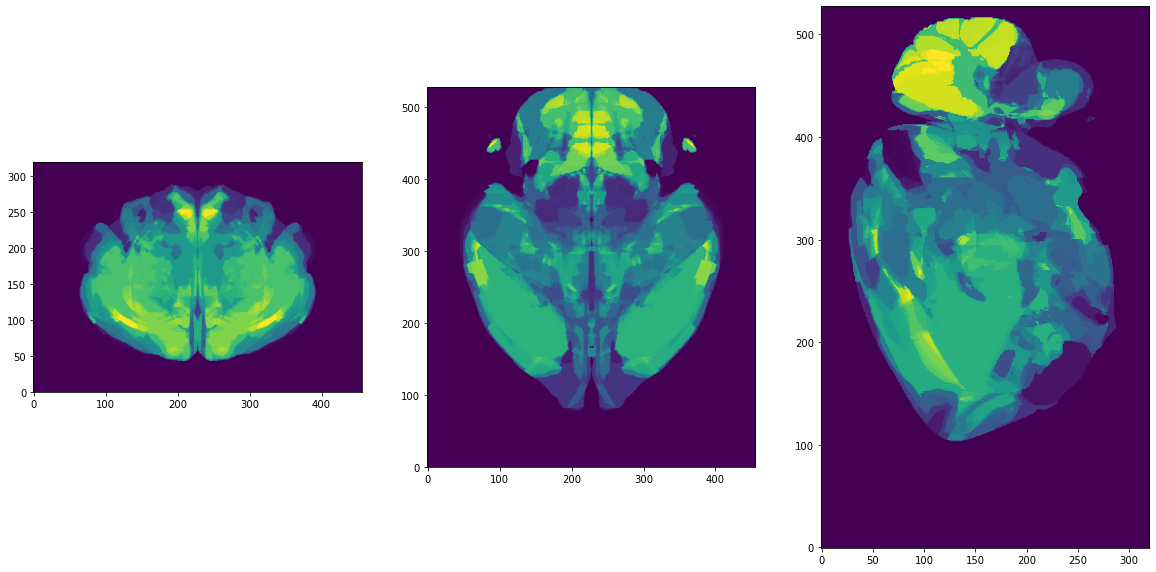

In [172]:
fig, axes = plt.subplots(ncols=3, figsize=(20, 10))
for dim, ax in enumerate(axes):
    ax.imshow(np.median(ara.annotation, axis=dim), origin='lower');

Okay, so the annotations attribute is a 3D numpy array with labeled areas.

In [136]:
ara.reference.shape

(528, 320, 456)

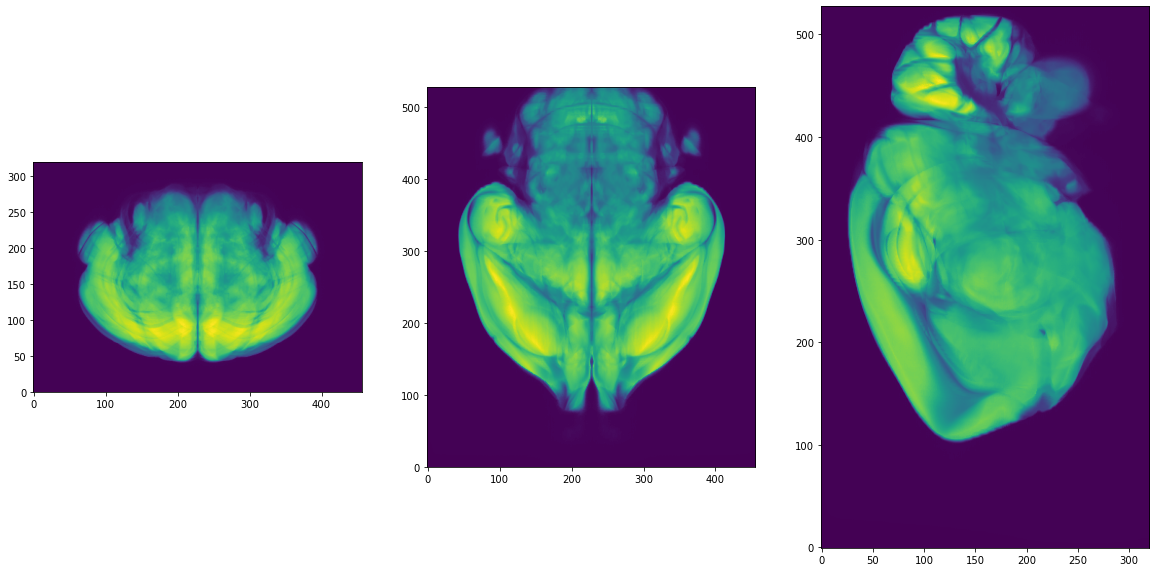

In [169]:
fig, axes = plt.subplots(ncols=3, figsize=(20, 10))
for dim, ax in enumerate(axes):
    ax.imshow(np.median(ara.reference, axis=dim), origin='lower');

## 4. Visualize individual template slices from the atlas, alongside their coordinate

It seems like I've already done quite a bit of that via the the **...from_coords()** methods, but let's see.

In [142]:
template = ara.reference
template.shape

(528, 320, 456)

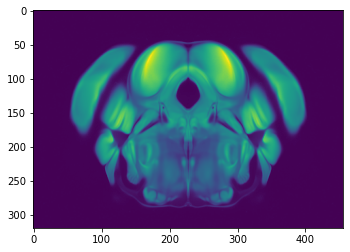

In [158]:
s = template[410]
plt.imshow(s);

In [149]:
type(s)

numpy.ndarray

Okay, so where am I looking right now?

In [159]:
ara.resolution

(25.0, 25.0, 25.0)

In [163]:
ara.space

<BGSpace AnatomicalSpace object>
origin: ('Anterior', 'Superior', 'Right')
sections: ('Frontal plane', 'Horizontal plane', 'Sagittal plane')
shape: (528, 320, 456)

In [166]:

print([el for el in dir(ara.space) if not el.startswith('_')])

['axes_description', 'axes_order', 'axis_labels', 'format_axis_label', 'get_axis_idx', 'index_pairs', 'lims_labels', 'map_planes_from_axes', 'map_points_to', 'map_stack_to', 'map_to', 'offset', 'origin', 'origin_string', 'plane_normals', 'resolution', 'sections', 'shape', 'space_axes', 'transformation_matrix_to']


In [168]:
ara.space.origin

('a', 's', 'r')

In [183]:
ara.orientation

'asr'

In [184]:
ara.shape_um

(13200.0, 8000.0, 11400.0)

In [185]:
ara.resolution

(25.0, 25.0, 25.0)

Talked with Adam about this.  Looks like there are some simple workarounds, but may be best to add this as a feature in bg-atlasapi.  Posted it on the issue board for discussion: https://github.com/brainglobe/bg-atlasapi/issues/88

## Overall Thoughts

The library was very easy to use and supplied pretty much everything I needed.  A little bit of coordinate manipulation would be helpful, so may need to either wrap it in a facade interface in the application or make some changes upstream.  But otherwise looks good.